In [18]:
#Intialization of Program.
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Convolution2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

from sklearn.metrics import confusion_matrix


In [3]:
# Complete Dataset images can be loaded using ImageDataGenerator function
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVillage/",
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_test.flow_from_directory("C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVillage/",
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

Found 20638 images belonging to 15 classes.
Found 20638 images belonging to 15 classes.


In [4]:
from keras.models import Sequential

detection = Sequential()


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Initialize the model
detection = Sequential()

# Convolutional layer-1
detection.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 3)))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2, 2)))
detection.add(Dropout(0.25))

# Convolutional layer-2
detection.add(Conv2D(128, (5, 5), padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2, 2)))
detection.add(Dropout(0.25))

# Convolutional layer-3
detection.add(Conv2D(256, (3, 3), padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2, 2)))
detection.add(Dropout(0.25))

# Convolutional layer-4
detection.add(Conv2D(512, (3, 3), padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2, 2)))
detection.add(Dropout(0.25))

# Convolutional layer-5
detection.add(Conv2D(512, (3, 3), padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2, 2)))
detection.add(Dropout(0.25))

# Flatten the output and add fully connected layers
detection.add(Flatten())
detection.add(Dense(256))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))

detection.add(Dense(512))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))

# Output layer
detection.add(Dense(15, activation='softmax'))



learning_rate = 0.005
optimum = Adam(learning_rate=learning_rate)
detection.compile(optimizer=optimum, loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\ADMIN_PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:

detection.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,321,423 (16.48 MB)

 Trainable params: 4,316,943 (16.47 MB)

 Non-trainable params: 4,480 (17.50 KB)

In [8]:
ephocs=10
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps
detection.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=ephocs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)
detection.save('Plant_Disease_Detection.h5')

Epoch 1/10


c:\Users\ADMIN_PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 486s 1s/step - accuracy: 0.4694 - loss: 1.7021 - val_accuracy: 0.2151 - val_loss: 7.9472
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.7656 - loss: 0.5554 - val_accuracy: 0.2333 - val_loss: 8.1268
Epoch 3/10


c:\Users\ADMIN_PC\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


322/322 ━━━━━━━━━━━━━━━━━━━━ 322s 998ms/step - accuracy: 0.7746 - loss: 0.6683 - val_accuracy: 0.7242 - val_loss: 0.9277
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.8438 - loss: 0.4717 - val_accuracy: 0.8333 - val_loss: 0.5629
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 319s 991ms/step - accuracy: 0.8497 - loss: 0.4420 - val_accuracy: 0.7433 - val_loss: 1.0265
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.9844 - loss: 0.1310 - val_accuracy: 0.6333 - val_loss: 1.5376
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 405s 1s/step - accuracy: 0.8760 - loss: 0.3618 - val_accuracy: 0.4063 - val_loss: 3.9093
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - accuracy: 0.8438 - loss: 0.5096 - val_accuracy: 0.3333 - val_loss: 3.5844
Epoch 9/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.9018 - loss: 0.2869 - val_accuracy: 0.7135 - val_loss: 0.9995
Epoch 10/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - accuracy: 0.8750 - loss: 0.3818 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


'Tomato_healthy'

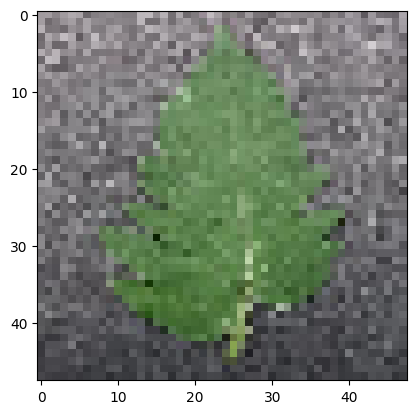

In [9]:
from tensorflow.keras.models import load_model
Detection=load_model('Plant_Disease_Detection.h5')
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
test_img=image.load_img("C:/Users/ADMIN_PC/Desktop/PlantVillage/PlantVillage/Tomato_healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.jpg",target_size=(48,48))
plt.imshow(test_img)
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=Detection.predict(test_img)
a=result.argmax()
# print('a:',a)
classes=train_generator.class_indices
# print(classes)
# print(len(classes))
category=[]
for i in classes:
          category.append(i)
for i in range(len(classes)):
          if(i==a):
              output=category[i]
output 